# Basic example of an event study with the sanpy module

In [1]:
from datetime import date
import numpy as np
import san

from san.extras.event_study import event_study, signals_format

### Collecting data:

In [2]:
data = san.get("ohlcv/bitcoin")
data["bitcoin"] = data.closePriceUsd
data["ETH_close"] = san.get("ohlcv/ethereum").closePriceUsd
data["daily_active_addresses_ETH"] = san.get("daily_active_addresses/ethereum")

data["daa_performance"] = np.log(data["daily_active_addresses_ETH"].pct_change() + 1)
data["sd_rolling"] = data["daa_performance"].rolling(100).std()

price = data[["ETH_close", "bitcoin"]]
price=price.tz_convert(None)  # Event Study needs date instead of datetime

### Defining the signal:

In [3]:
# Defining signals:
# Buy Signal: Is the current trend lower than two standard deviations?
data["buy"] = (data["daa_performance"] < (data["sd_rolling"] * (-1) * 2))
# Sell Signal: Is the current trend higher than two standard deviations?
data["sell"] = (data["daa_performance"] > (data["sd_rolling"] * 2))

### Using the helper function to get the signals in the right format and executing the event study:

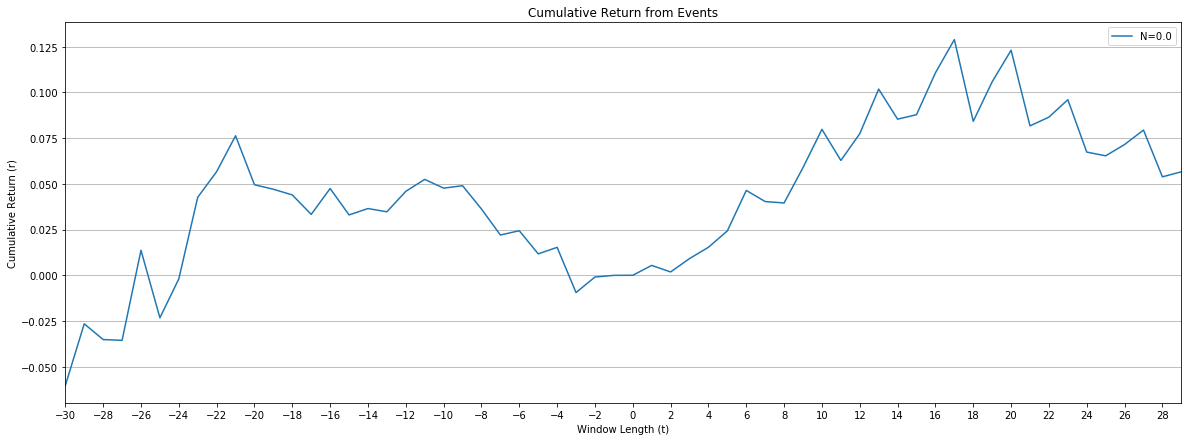

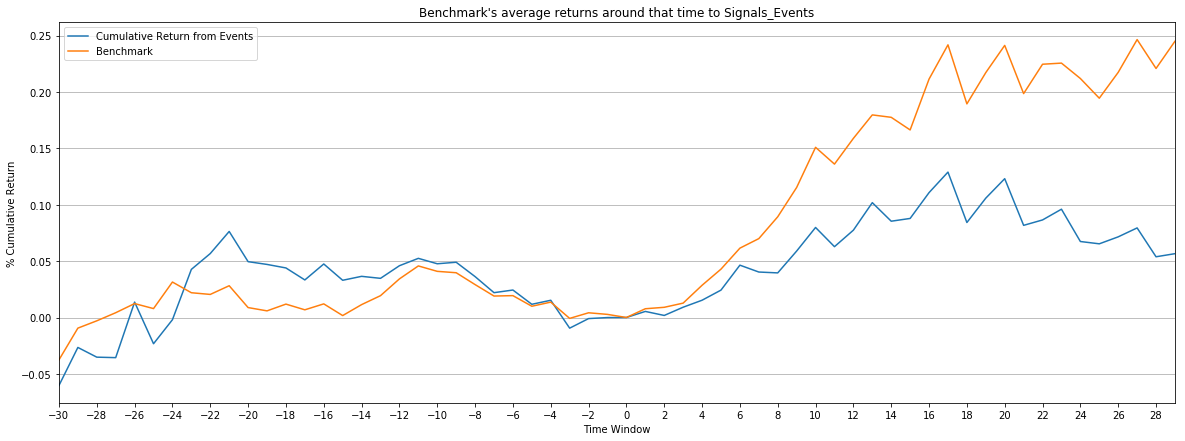

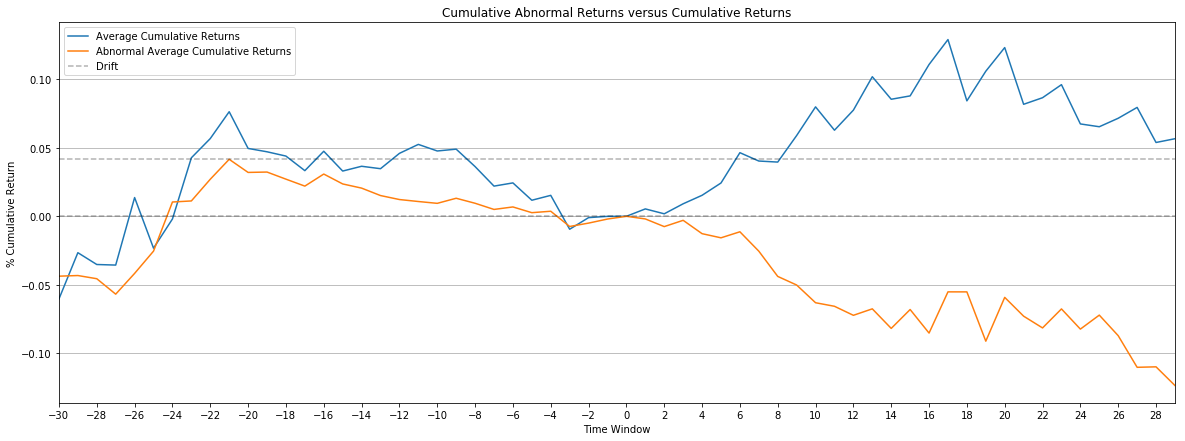

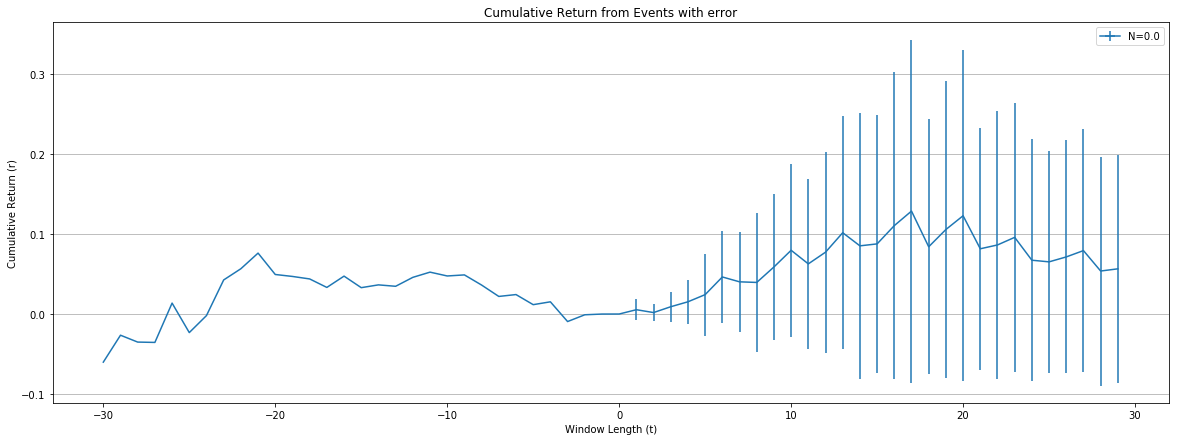

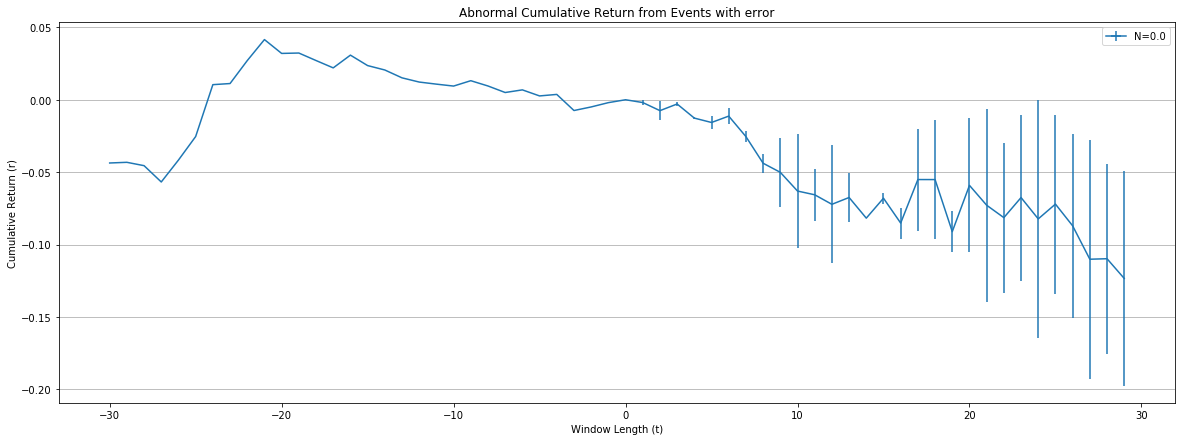

In [5]:
# Helper function to get the signals in the right format:
signals = signals_format(data["sell"],'ETH_close')

# Calling the event study:
event_study(price, signals, starting_point = 30)